In [1]:
# required imports

import xlrd
import random
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('COVID19INDIA.csv')
df.head()

,States,Total Cases,Recovered,Death,Date,Latitude,Longitude
0,Andaman and Nicobar Islands,16,11,0,2020-04-21,11.7401,92.6586
1,Andhra Pradesh,757,96,22,2020-04-21,15.9129,79.7400
2,Arunachal Pradesh,1,1,0,2020-04-21,28.2180,94.7278
3,Assam,35,19,1,2020-04-21,26.2006,92.9376
4,Bihar,114,42,2,2020-04-21,25.0961,85.3131


In [3]:
fp = "Igismap/Indian_States.shp"
map_df = gpd.read_file(fp)
map_df

,st_nm,geometry
0,Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
1,Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432..."
2,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26..."
3,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24..."
4,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623..."
5,Chhattisgarh,"POLYGON ((83.33532 24.09885, 83.35346 24.09627..."
6,Dadara & Nagar Havelli,"POLYGON ((73.20657 20.12216, 73.20797 20.10650..."
7,Daman & Diu,"MULTIPOLYGON (((72.89335 20.44539, 72.89281 20..."
8,Goa,"MULTIPOLYGON (((74.11918 14.75344, 74.11350 14..."
9,Gujarat,"MULTIPOLYGON (((71.70375 20.99958, 71.70375 20..."


In [4]:
# change state name to match in both files -- I manually checked few
map_df['st_nm'].iloc[0]  = 'Andaman and Nicobar Islands'
map_df['st_nm'].iloc[12] = 'Jammu and Kashmir'
map_df['st_nm'].iloc[6] = 'Dadara and Nagar Havelli'
map_df['st_nm'].iloc[23] = 'Delhi'

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


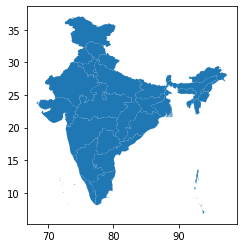

In [5]:
#default plot
map_df.plot()

In [6]:
# Join both the DataFrames by state names

merged = map_df.set_index('st_nm').join(df.set_index('States'))

#fill NaN values with Zero

merged[['Total Cases', 'Recovered', 'Death']] = merged[['Total Cases', 'Recovered', 'Death']].fillna(0).astype('int')
merged.head()

,geometry,Total Cases,Recovered,Death,Date,Latitude,Longitude
st_nm,,,,,,,
Andaman and Nicobar Islands,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...",16,11,0,2020-04-21,11.7401,92.6586
Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432...",0,0,0,NaN,NaN,NaN
Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...",35,19,1,2020-04-21,26.2006,92.9376
Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...",114,42,2,2020-04-21,25.0961,85.3131
Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623...",26,13,0,2020-04-21,30.7333,76.7794


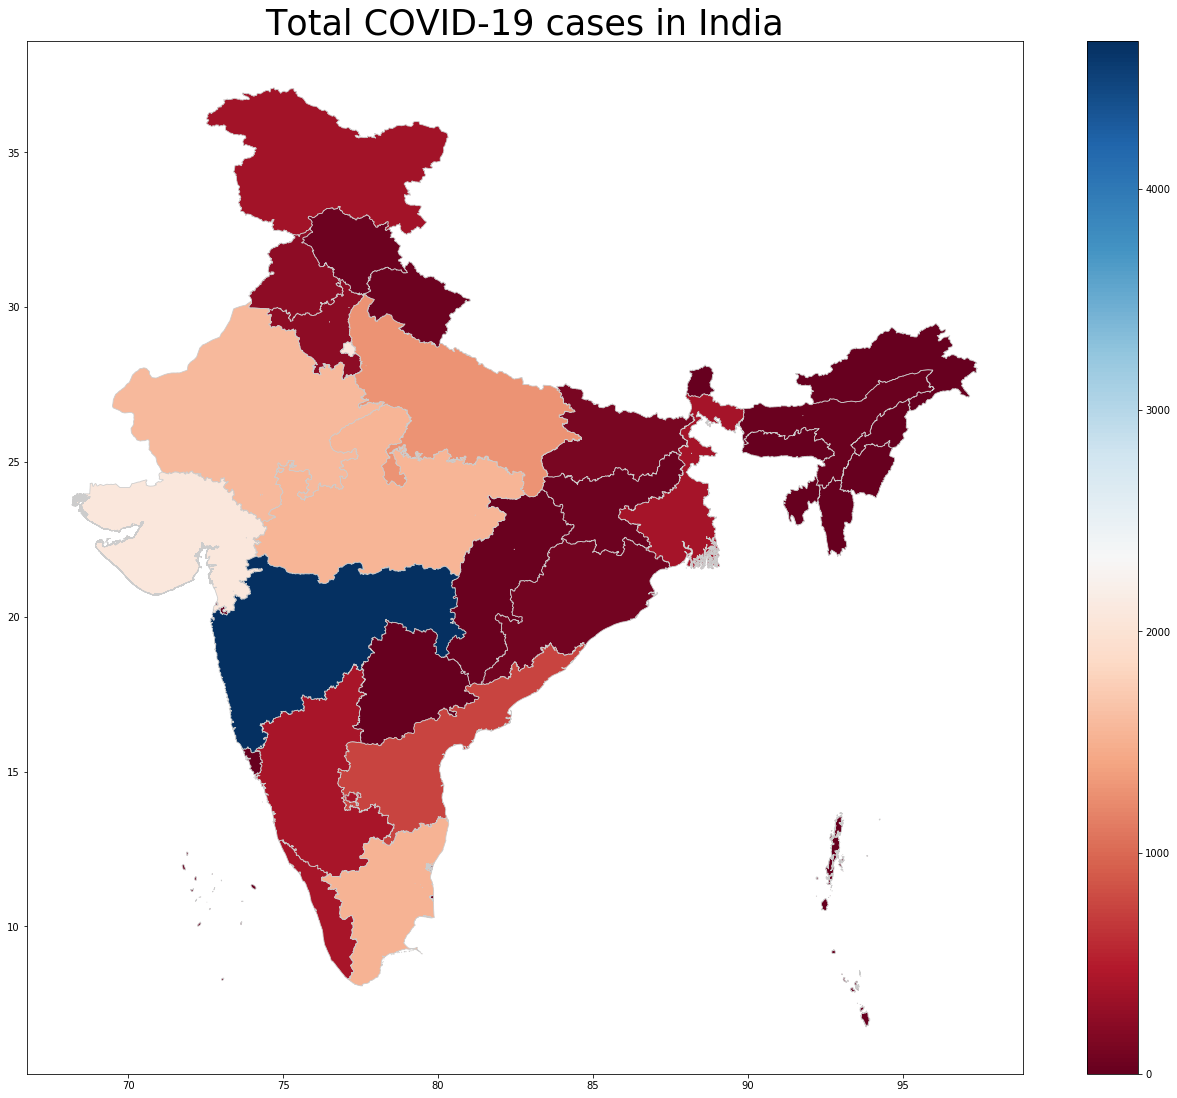

In [7]:
# create figure and axes for Matplotlib and set the title
fig, ax = plt.subplots(1, figsize=(23, 19))
ax.axis('on')
ax.set_title('Total COVID-19 cases in India', fontdict={'fontsize': '35', 'fontweight' : '5'})

# plot the figure
merged.plot(column='Total Cases', cmap='RdBu', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

In [8]:
# Save the output as a PNG image
fig.savefig("TotalCase_India.png", dpi=100)

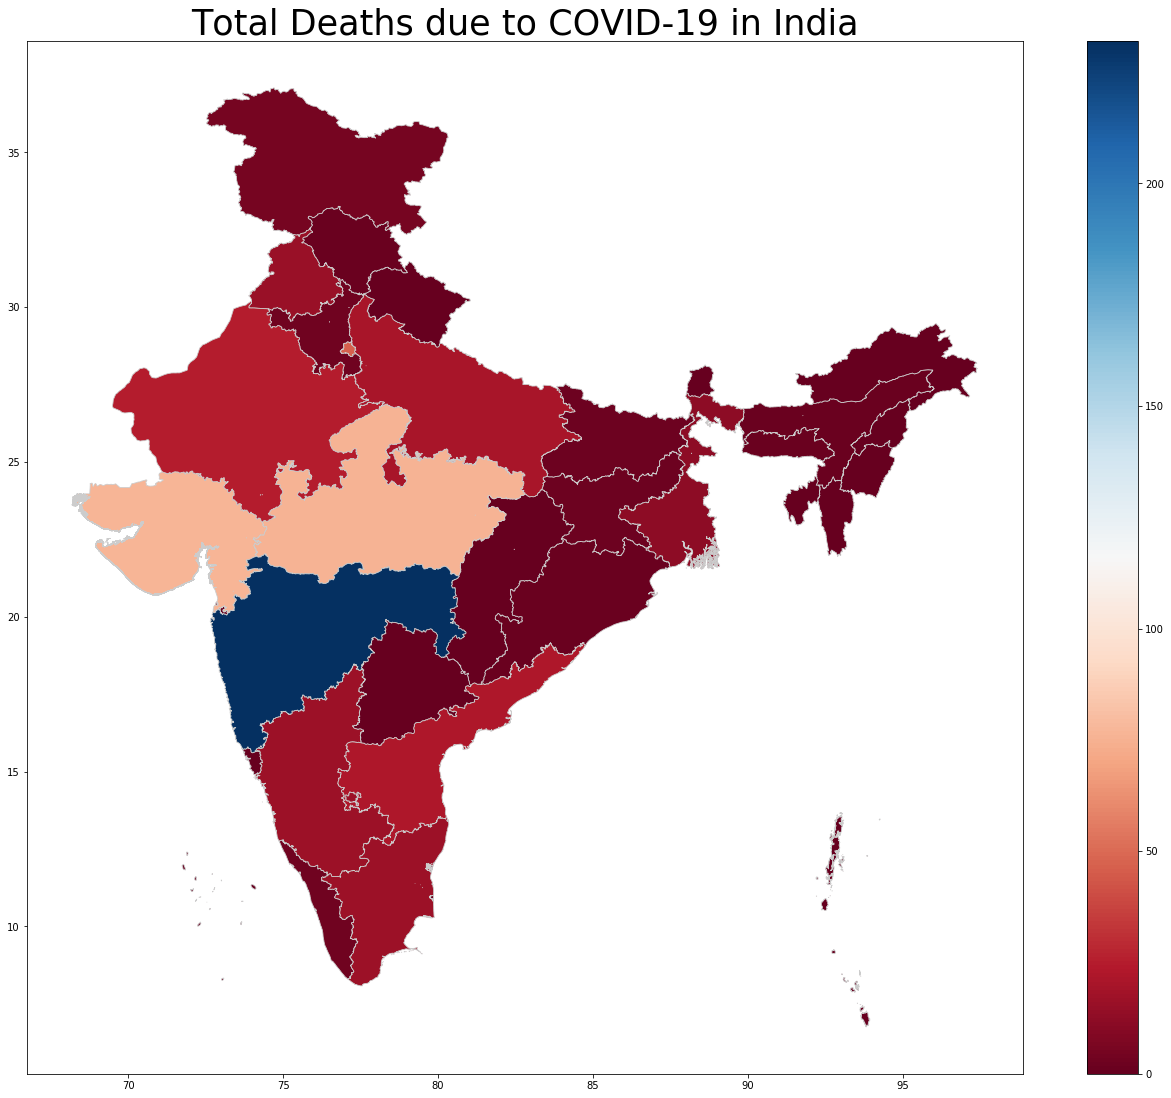

In [9]:
# create figure and axes for Matplotlib and set the title
fig, ax = plt.subplots(1, figsize=(23, 19))
ax.axis('on')
ax.set_title('Total Deaths due to COVID-19 in India', fontdict={'fontsize': '35', 'fontweight' : '5'})

# plot the figure
merged.plot(column='Death', cmap='RdBu', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

In [10]:
# Save the output as a PNG image
fig.savefig("TotalDeath_India.png", dpi=100)